<a href="https://colab.research.google.com/github/MFRoz1/IntelligoCompetition/blob/main/Full_1_(manual_fitur_selection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
df_Customers = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_Customers.csv')
df_Orderitems = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_OrderItems.csv')
df_Orders = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_Orders.csv')
df_Payments = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_Payments.csv')
df_Products = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_Products.csv')


Yang jadi acuan utama order id

In [ ]:
df_Customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP
...,...,...,...,...
89311,bfJtzkBGksdY,94060,amparo,SP
89312,4hjsCpj6FC7g,99835,itapevi,SP
89313,DLn56oKHl9bv,2540,sao paulo,SP
89314,auSfRYUQUOIq,12288,paulinia,SP


In [ ]:
df_Orderitems

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66
...,...,...,...,...,...
89311,zlcLnXGgAabl,W8vikEizUggJ,2QjevWskirjm,31.99,188.65
89312,IlTAoIkILwrq,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64
89313,uA6oXfftGVmT,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09
89314,v3QtU6xlGDJp,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01


In [ ]:
df_Orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [ ]:
df_Orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
df_Orders['order_status'].unique()

array(['delivered', 'canceled', 'shipped', 'processing', 'invoiced',
       'unavailable', 'approved'], dtype=object)

In [ ]:
df_Orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
dtype: int64

In [ ]:
df_Payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15
...,...,...,...,...,...
89311,zlcLnXGgAabl,1,wallet,1,128.00
89312,IlTAoIkILwrq,1,wallet,1,106.86
89313,uA6oXfftGVmT,1,credit_card,1,376.39
89314,v3QtU6xlGDJp,1,voucher,1,48.05


In [ ]:
df_Products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...
89311,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0
89312,KXSbyJWtMMwZ,toys,600.0,16.0,16.0,16.0
89313,EG4wDSpFyTth,health_beauty,250.0,22.0,10.0,18.0
89314,ZWyg4uNWPHjJ,toys,250.0,16.0,2.0,11.0


# Ekstraksi Fitur

In [ ]:
data_new = pd.DataFrame(df_Customers[['customer_state']].join(df_Orderitems[['shipping_charges']]).join(df_Orders[['order_id', 'order_purchase_timestamp','order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date']]).join(df_Products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]))

# Checking data for new DataFrame

In [ ]:
print(data_new)

      customer_state  shipping_charges      order_id order_purchase_timestamp  \
0                 SP             84.65  Axfy13Hk4PIk      2017-10-22 18:57:54   
1                 RJ             23.79  v6px92oS8cLG      2018-06-20 21:40:31   
2                 SP             17.38  Ulpf9skrhjfm      2018-02-16 16:19:31   
3                 MG             30.72  bwJVWupf2keN      2018-08-18 18:04:29   
4                 SP             30.66  Dd0QnrMk9Cj5      2017-12-22 16:44:04   
...              ...               ...           ...                      ...   
89311             SP            188.65  zlcLnXGgAabl      2018-08-19 17:25:36   
89312             SP              1.64  IlTAoIkILwrq      2017-12-15 11:20:27   
89313             SP              4.09  uA6oXfftGVmT      2018-07-24 06:39:14   
89314             SP            113.01  v3QtU6xlGDJp      2018-08-11 08:04:22   
89315             DF             70.06  Xo1fqyXOC6CR      2018-06-09 21:46:58   

         order_approved_at 

#Data Preprocessing

## Handling missing values

In [ ]:
data_new.isna().sum()

customer_state                      0
shipping_charges                    0
order_id                            0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
product_weight_g                   15
product_length_cm                  15
product_height_cm                  15
product_width_cm                   15
dtype: int64

Pengisian data

['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'] dengan nilai rata rata


In [ ]:
data_new[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = data_new[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].fillna(data_new[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean())

In [ ]:
data_new

,customer_state,shipping_charges,order_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,SP,84.65,Axfy13Hk4PIk,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,491.0,19.0,12.0,16.0
1,RJ,23.79,v6px92oS8cLG,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,440.0,18.0,14.0,17.0
2,SP,17.38,Ulpf9skrhjfm,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,2200.0,16.0,16.0,16.0
3,MG,30.72,bwJVWupf2keN,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,1450.0,68.0,3.0,48.0
4,SP,30.66,Dd0QnrMk9Cj5,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
89311,SP,188.65,zlcLnXGgAabl,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,700.0,21.0,14.0,14.0
89312,SP,1.64,IlTAoIkILwrq,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,600.0,16.0,16.0,16.0
89313,SP,4.09,uA6oXfftGVmT,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,250.0,22.0,10.0,18.0
89314,SP,113.01,v3QtU6xlGDJp,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,250.0,16.0,2.0,11.0


In [ ]:
data_new.isna().sum()

customer_state                      0
shipping_charges                    0
order_id                            0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
dtype: int64

In [ ]:
data_new_drop = data_new.dropna()
data_new_drop

,customer_state,shipping_charges,order_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,SP,84.65,Axfy13Hk4PIk,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,491.0,19.0,12.0,16.0
1,RJ,23.79,v6px92oS8cLG,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,440.0,18.0,14.0,17.0
2,SP,17.38,Ulpf9skrhjfm,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,2200.0,16.0,16.0,16.0
3,MG,30.72,bwJVWupf2keN,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,1450.0,68.0,3.0,48.0
4,SP,30.66,Dd0QnrMk9Cj5,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
89311,SP,188.65,zlcLnXGgAabl,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,700.0,21.0,14.0,14.0
89312,SP,1.64,IlTAoIkILwrq,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,600.0,16.0,16.0,16.0
89313,SP,4.09,uA6oXfftGVmT,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,250.0,22.0,10.0,18.0
89314,SP,113.01,v3QtU6xlGDJp,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,250.0,16.0,2.0,11.0


In [ ]:
data_new_drop.isna().sum()

customer_state                   0
shipping_charges                 0
order_id                         0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

## Handling Outlier

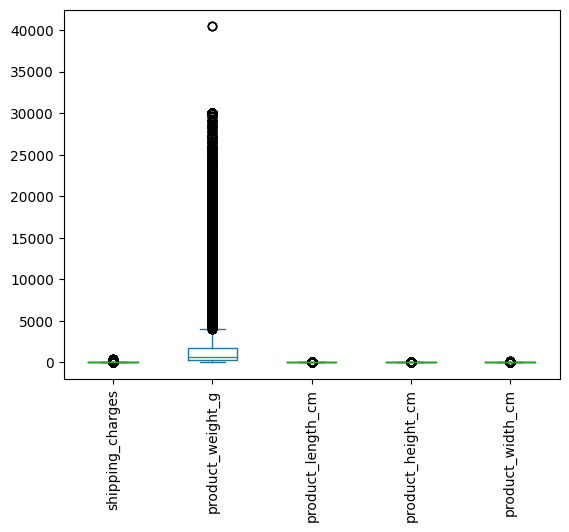

In [ ]:
# Check Outlier menggunakan boxplot
data_new_drop[['shipping_charges', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].plot(kind = 'box')
plt.xticks(rotation = 90)
plt.show()

## Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Mendefinisikan nilai unique dari masing masing kolom yang akan di encodimg
col = sorted(data_new_drop['customer_state'].unique().tolist())
print(col)

['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']


In [ ]:
# Mengubah kolom menggunakan OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
encod = pd.DataFrame(ohe.fit_transform(data_new_drop[['customer_state']]).toarray(), columns = col)
encod

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data Pre Modelling

In [ ]:
data_new_drop.columns

Index(['customer_state', 'shipping_charges', 'order_id',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')

In [ ]:
data_new_drop

,customer_state,shipping_charges,order_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,SP,84.65,Axfy13Hk4PIk,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,491.0,19.0,12.0,16.0
1,RJ,23.79,v6px92oS8cLG,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,440.0,18.0,14.0,17.0
2,SP,17.38,Ulpf9skrhjfm,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,2200.0,16.0,16.0,16.0
3,MG,30.72,bwJVWupf2keN,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,1450.0,68.0,3.0,48.0
4,SP,30.66,Dd0QnrMk9Cj5,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
89311,SP,188.65,zlcLnXGgAabl,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,700.0,21.0,14.0,14.0
89312,SP,1.64,IlTAoIkILwrq,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,600.0,16.0,16.0,16.0
89313,SP,4.09,uA6oXfftGVmT,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,250.0,22.0,10.0,18.0
89314,SP,113.01,v3QtU6xlGDJp,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,250.0,16.0,2.0,11.0


In [ ]:
data_new_drop = data_new_drop.reset_index(drop=True)
data_new_drop

,customer_state,shipping_charges,order_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,SP,84.65,Axfy13Hk4PIk,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,491.0,19.0,12.0,16.0
1,RJ,23.79,v6px92oS8cLG,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,440.0,18.0,14.0,17.0
2,SP,17.38,Ulpf9skrhjfm,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,2200.0,16.0,16.0,16.0
3,MG,30.72,bwJVWupf2keN,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,1450.0,68.0,3.0,48.0
4,SP,30.66,Dd0QnrMk9Cj5,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
87413,SP,188.65,zlcLnXGgAabl,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,700.0,21.0,14.0,14.0
87414,SP,1.64,IlTAoIkILwrq,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,600.0,16.0,16.0,16.0
87415,SP,4.09,uA6oXfftGVmT,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,250.0,22.0,10.0,18.0
87416,SP,113.01,v3QtU6xlGDJp,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,250.0,16.0,2.0,11.0


In [ ]:
data_final = data_new_drop.join(encod)
data_final


,customer_state,shipping_charges,order_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_weight_g,product_length_cm,product_height_cm,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,SP,84.65,Axfy13Hk4PIk,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,491.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,RJ,23.79,v6px92oS8cLG,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,440.0,18.0,14.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SP,17.38,Ulpf9skrhjfm,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,2200.0,16.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,MG,30.72,bwJVWupf2keN,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,1450.0,68.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SP,30.66,Dd0QnrMk9Cj5,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,300.0,17.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,SP,188.65,zlcLnXGgAabl,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,700.0,21.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87414,SP,1.64,IlTAoIkILwrq,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,600.0,16.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87415,SP,4.09,uA6oXfftGVmT,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,250.0,22.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87416,SP,113.01,v3QtU6xlGDJp,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,250.0,16.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Drop kolom yang tidak digunakan, yaitu kolom Q9-What is an ideal student life ? dan response_id
data_final = data_final.drop(columns = ['customer_state', 'order_id'], axis = 1)

In [ ]:
data_final

,shipping_charges,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_weight_g,product_length_cm,product_height_cm,product_width_cm,AC,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,84.65,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,491.0,19.0,12.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,23.79,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,440.0,18.0,14.0,17.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.38,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,2200.0,16.0,16.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30.72,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,1450.0,68.0,3.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.66,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,300.0,17.0,4.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,188.65,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,700.0,21.0,14.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87414,1.64,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,600.0,16.0,16.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87415,4.09,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,250.0,22.0,10.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87416,113.01,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,250.0,16.0,2.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_final = data_final.drop(columns = ['order_purchase_timestamp', 'order_approved_at','order_delivered_timestamp', 'order_estimated_delivery_date'], axis = 1)

In [ ]:
data_final

,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,AC,AL,AM,AP,BA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,84.65,491.0,19.0,12.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,23.79,440.0,18.0,14.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.38,2200.0,16.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30.72,1450.0,68.0,3.0,48.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.66,300.0,17.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,188.65,700.0,21.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87414,1.64,600.0,16.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87415,4.09,250.0,22.0,10.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87416,113.01,250.0,16.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modelling

In [ ]:
# Melakukan pengecekan korelasi antar variabel menggunakan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

data_final_pca = pca.fit_transform(data_final)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99868019e-01, 1.01608547e-04])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_final_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
pred = kmeans.predict(data_final_pca)
print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
centroids = kmeans.cluster_centers_

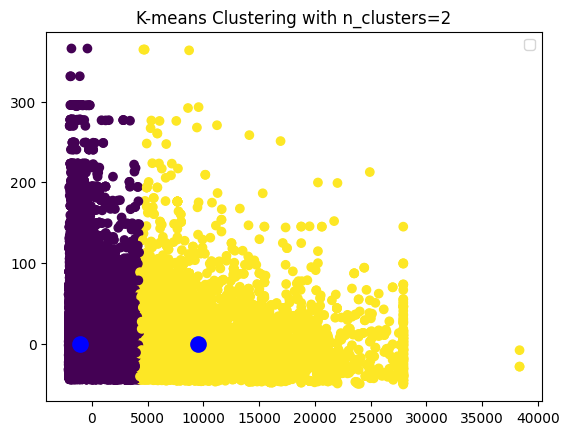

In [ ]:
# Visualize the results
plt.scatter(data_final_pca[:, 0], data_final_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=100, linewidths=2, color='b')
plt.title('K-means Clustering with n_clusters=2')
plt.legend()
plt.show()

In [ ]:
data_final_pca

array([[-1591.13797556,    40.66219329],
       [-1642.14763808,   -20.17732912],
       [  117.84012695,   -27.05973532],
       ...,
       [-1832.15001288,   -39.79631261],
       [-1832.16496672,    68.99968036],
       [ -332.09737693,    25.92588283]])

In [ ]:
data_final['is_late'] = pred

In [ ]:
data_final

,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,AC,AL,AM,AP,BA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,is_late
0,84.65,491.0,19.0,12.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,23.79,440.0,18.0,14.0,17.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,17.38,2200.0,16.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,30.72,1450.0,68.0,3.0,48.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,30.66,300.0,17.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,188.65,700.0,21.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
87414,1.64,600.0,16.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
87415,4.09,250.0,22.0,10.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
87416,113.01,250.0,16.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


#Define Data Testing

In [ ]:
test_Customers = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/test/df_Customers.csv')
test_Orderitems = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/test/df_OrderItems.csv')
test_Products = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/test/df_Products.csv')
test_Orders = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/test/df_Orders.csv')

In [ ]:
test_Customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,I74lXDOfoqsp,6020,goiania,GO
1,47TuLHF2s7X5,23020,viamao,RS
2,dQ0dqI8Qwlj8,75094,campinas,SP
3,iQCmWhNkIczb,89284,santana de parnaiba,SP
4,Dp2g6JH8tO5Z,39810,aripuana,MT
...,...,...,...,...
38274,Dw3aCTFf4Q4G,26160,guarulhos,SP
38275,JmHJqJvpVcJs,39628,rio de janeiro,RJ
38276,ro5DikwWCC3j,89284,santana de parnaiba,SP
38277,R25nE2rl77AU,60867,sao paulo,SP


In [ ]:
test_Orderitems

,order_id,product_id,seller_id,price,shipping_charges
0,u6rPMRAYIGig,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90
1,ohY8f4FEbX19,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28
2,I28liQek73i2,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11
3,bBG1T89mlY8W,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05
4,CYxJJSQS8Lbo,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41
...,...,...,...,...,...
38274,QKBW3XKevmfn,wr6barwyoaIE,XURInBuULfIO,99.25,37.66
38275,Tjiw9bj8HtLr,sPZVXBD9lf3e,wR4cqCClYDyY,86.32,40.98
38276,mCPofb7A1aTq,Th6SHMsyTOMH,Gp2lLacVPwug,104.45,30.24
38277,scVuqN10zbgb,PyjlDSHRGdSt,al4fWZ5NFQzG,223.87,74.75


In [ ]:
test_Products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1slxdgbgWFax,toys,50.0,16.0,5.0,11.0
1,77PgsiElQLeB,electronics,200.0,21.0,7.0,14.0
2,QVlD26X1y7NI,furniture_decor,1000.0,100.0,5.0,20.0
3,yWlFGkKYfrpa,toys,8950.0,40.0,30.0,40.0
4,h6MCbrwh5kiC,toys,2301.0,32.0,35.0,34.0
...,...,...,...,...,...,...
38274,wr6barwyoaIE,toys,200.0,16.0,28.0,11.0
38275,sPZVXBD9lf3e,toys,5150.0,22.0,3.0,22.0
38276,Th6SHMsyTOMH,toys,430.0,21.0,11.0,17.0
38277,PyjlDSHRGdSt,toys,1850.0,24.0,36.0,23.0


In [ ]:
test_Orders

,order_id,customer_id,order_purchase_timestamp,order_approved_at
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30
...,...,...,...,...
38274,QKBW3XKevmfn,Dw3aCTFf4Q4G,2018-08-24 11:54:56,2018-08-24 12:05:22
38275,Tjiw9bj8HtLr,JmHJqJvpVcJs,2017-03-25 20:39:11,2017-03-25 20:50:17
38276,mCPofb7A1aTq,ro5DikwWCC3j,2018-08-16 13:39:30,2018-08-17 03:31:06
38277,scVuqN10zbgb,R25nE2rl77AU,2018-06-27 13:17:05,2018-06-28 08:50:58


In [ ]:
data_test = pd.DataFrame(test_Customers[['customer_state']].join(test_Orderitems[['shipping_charges']]).join(test_Orders[['order_id', 'order_purchase_timestamp','order_approved_at']]).join(test_Products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]))

In [ ]:
data_test

,customer_state,shipping_charges,order_id,order_purchase_timestamp,order_approved_at,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,GO,20.90,u6rPMRAYIGig,2017-11-18 12:29:57,2017-11-18 12:46:08,50.0,16.0,5.0,11.0
1,RS,12.28,ohY8f4FEbX19,2018-06-02 17:13:12,2018-06-02 20:12:23,200.0,21.0,7.0,14.0
2,SP,67.11,I28liQek73i2,2018-01-08 11:01:30,2018-01-09 07:24:03,1000.0,100.0,5.0,20.0
3,SP,62.05,bBG1T89mlY8W,2017-03-10 10:24:46,2017-03-10 10:24:46,8950.0,40.0,30.0,40.0
4,MT,9.41,CYxJJSQS8Lbo,2017-12-02 10:04:07,2017-12-05 04:13:30,2301.0,32.0,35.0,34.0
...,...,...,...,...,...,...,...,...,...
38274,SP,37.66,QKBW3XKevmfn,2018-08-24 11:54:56,2018-08-24 12:05:22,200.0,16.0,28.0,11.0
38275,RJ,40.98,Tjiw9bj8HtLr,2017-03-25 20:39:11,2017-03-25 20:50:17,5150.0,22.0,3.0,22.0
38276,SP,30.24,mCPofb7A1aTq,2018-08-16 13:39:30,2018-08-17 03:31:06,430.0,21.0,11.0,17.0
38277,SP,74.75,scVuqN10zbgb,2018-06-27 13:17:05,2018-06-28 08:50:58,1850.0,24.0,36.0,23.0


In [ ]:
data_test.isna().sum()

customer_state               0
shipping_charges             0
order_id                     0
order_purchase_timestamp     0
order_approved_at            7
product_weight_g            10
product_length_cm           10
product_height_cm           10
product_width_cm            10
dtype: int64

## Handling Missing Values [test]

In [ ]:
data_test[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = data_test[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].fillna(data_new[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean())

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Mendefinisikan nilai unique dari masing masing kolom yang akan di encodimg
col = sorted(data_test['customer_state'].unique().tolist())
print(col)

['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']


In [ ]:
# Mengubah kolom menggunakan OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
encod = pd.DataFrame(ohe.fit_transform(data_test[['customer_state']]).toarray(), columns = col)
encod

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_test_final = data_test.join(encod)
data_test_final

,customer_state,shipping_charges,order_id,order_purchase_timestamp,order_approved_at,product_weight_g,product_length_cm,product_height_cm,product_width_cm,AC,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,GO,20.90,u6rPMRAYIGig,2017-11-18 12:29:57,2017-11-18 12:46:08,50.0,16.0,5.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RS,12.28,ohY8f4FEbX19,2018-06-02 17:13:12,2018-06-02 20:12:23,200.0,21.0,7.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,SP,67.11,I28liQek73i2,2018-01-08 11:01:30,2018-01-09 07:24:03,1000.0,100.0,5.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,SP,62.05,bBG1T89mlY8W,2017-03-10 10:24:46,2017-03-10 10:24:46,8950.0,40.0,30.0,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,MT,9.41,CYxJJSQS8Lbo,2017-12-02 10:04:07,2017-12-05 04:13:30,2301.0,32.0,35.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,SP,37.66,QKBW3XKevmfn,2018-08-24 11:54:56,2018-08-24 12:05:22,200.0,16.0,28.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38275,RJ,40.98,Tjiw9bj8HtLr,2017-03-25 20:39:11,2017-03-25 20:50:17,5150.0,22.0,3.0,22.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38276,SP,30.24,mCPofb7A1aTq,2018-08-16 13:39:30,2018-08-17 03:31:06,430.0,21.0,11.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38277,SP,74.75,scVuqN10zbgb,2018-06-27 13:17:05,2018-06-28 08:50:58,1850.0,24.0,36.0,23.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_test_final = data_test_final.drop(columns = ['customer_state', 'order_id'], axis = 1)

In [ ]:
data_test_final = data_test_final.drop(columns = ['order_purchase_timestamp', 'order_approved_at'], axis = 1)

In [ ]:
data_test_final

,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,AC,AL,AM,AP,BA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,20.90,50.0,16.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.28,200.0,21.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,67.11,1000.0,100.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,62.05,8950.0,40.0,30.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9.41,2301.0,32.0,35.0,34.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,37.66,200.0,16.0,28.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38275,40.98,5150.0,22.0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38276,30.24,430.0,21.0,11.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38277,74.75,1850.0,24.0,36.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Melakukan pengecekan korelasi antar variabel menggunakan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

data_testfinal_pca = pca.fit_transform(data_test_final)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99873359e-01, 9.72009154e-05])

In [ ]:
pred_test = kmeans.predict(data_testfinal_pca)
print(pred_test)

[0 0 0 ... 0 0 0]


In [ ]:
data_test_final['is_late'] = pred_test

In [ ]:
data_test_final

,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,AC,AL,AM,AP,BA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,is_late
0,20.90,50.0,16.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,12.28,200.0,21.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,67.11,1000.0,100.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,62.05,8950.0,40.0,30.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,9.41,2301.0,32.0,35.0,34.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,37.66,200.0,16.0,28.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38275,40.98,5150.0,22.0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
38276,30.24,430.0,21.0,11.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
38277,74.75,1850.0,24.0,36.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


#Optimizing with Classification


In [ ]:
data_clas = data_test_final.drop(columns = ['is_late'], axis = 1)

In [ ]:
data_clas

,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,AC,AL,AM,AP,BA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,20.90,50.0,16.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.28,200.0,21.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,67.11,1000.0,100.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,62.05,8950.0,40.0,30.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9.41,2301.0,32.0,35.0,34.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,37.66,200.0,16.0,28.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38275,40.98,5150.0,22.0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38276,30.24,430.0,21.0,11.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38277,74.75,1850.0,24.0,36.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test = data_test_final.drop(columns = ['is_late'], axis = 1)
y_test = data_test_final['is_late']

In [ ]:
X_train = data_final.drop(columns = ['is_late'], axis = 1)
y_train = data_final['is_late']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Membuat objek Logistic Regression
model = LogisticRegression()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred_LR = model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred_LR)
print("Akurasi Logistic Regression:", accuracy)


Akurasi Logistic Regression: 0.9751299668225398


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membuat objek Decision Tree
model = DecisionTreeClassifier()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred_DTC = model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred_DTC)
print("Akurasi Decision Trees:", accuracy)


Akurasi Decision Trees: 0.999503644295828


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Membuat objek SVM
model = SVC()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred_SVM = model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred_SVM)
print("Akurasi SVM:", accuracy)


Akurasi SVM: 0.9998955040622796


In [ ]:
data_clas['is_late'] = y_pred_SVM

In [ ]:
y_pred_SVM

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
data_clas.head(50)

,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,AC,AL,AM,AP,BA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,is_late
0,20.90,50.0,16.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,12.28,200.0,21.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,67.11,1000.0,100.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,62.05,8950.0,40.0,30.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,9.41,2301.0,32.0,35.0,34.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,20.65,400.0,22.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
6,23.87,12850.0,36.0,56.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
7,44.59,18800.0,60.0,40.0,42.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
8,39.88,375.0,16.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9,2.46,200.0,16.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
data_clas.to_csv("Data Ace Age ver 1.csv", index = False)